In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
credit_card_df = pd.read_excel('/Users/annabialas/Documents/Projects/Citadel/2. Excel_Credit_Card_Data.xlsx', sheet_name='DAILY_DATA')
normalization_df = pd.read_excel('/Users/annabialas/Documents/Projects/Citadel/2. Excel_Credit_Card_Data.xlsx', sheet_name='TOTAL_PANEL_INFORMATION')

In [3]:
credit_card_df['TRANSACTION_DATE'] = pd.to_datetime(credit_card_df['TRANSACTION_DATE'])
credit_card_df['MONTH-YEAR'] = pd.to_datetime(credit_card_df['TRANSACTION_DATE'].dt.strftime('%Y-%m'))
credit_card_df.head()

,TRANSACTION_DATE,COMPANY,MERCHANT,TRANSACTION_COUNT,TRANSACTED_VALUE,MONTH-YEAR
0,2012-06-21,Arbys,Arbys,3825,37892.475210,2012-06-01
1,2012-06-22,Arbys,Arbys,3884,39552.138593,2012-06-01
2,2012-06-23,Arbys,Arbys,3113,36953.707410,2012-06-01
3,2012-06-24,Arbys,Arbys,3457,38104.701896,2012-06-01
4,2012-06-25,Arbys,Arbys,3480,34012.726002,2012-06-01


In [8]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35791 entries, 0 to 35790
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TRANSACTION_DATE   35791 non-null  datetime64[ns]
 1   COMPANY            35791 non-null  object        
 2   MERCHANT           35791 non-null  object        
 3   TRANSACTION_COUNT  35791 non-null  int64         
 4   TRANSACTED_VALUE   35791 non-null  float64       
 5   MONTH-YEAR         35791 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 1.6+ MB


In [9]:
merchants = ['McDonalds', 'Wendys', 'Burger King', 'Pizza Hut', 'Dominos Pizza', 'Papa Johns']
credit_card_df = credit_card_df.loc[credit_card_df['MERCHANT'].isin(merchants), :]
credit_card_df = credit_card_df.loc[credit_card_df['TRANSACTION_DATE'] >= '2012-07-01']
credit_card_df.groupby('MERCHANT').agg({'TRANSACTION_DATE': ['min', 'max', 'count']})

TRANSACTION_DATE                 
                           min        max count
MERCHANT                                       
Burger King         2012-07-01 2014-12-31   895
Dominos Pizza       2012-07-01 2014-12-31   895
McDonalds           2012-07-01 2014-12-31   895
Papa Johns          2012-07-01 2014-12-31   895
Pizza Hut           2012-07-01 2014-12-31   895
Wendys              2012-07-01 2014-12-31   895

Each merchant is represented in the correct timespan. Additionally, we can see that there is an equal number of timestamps recorded for each of the merchants.

### EDA

In [10]:
start_date = '2012-07-01'
end_date = '2014-12-31'

full_range = pd.date_range(start=start_date, end=end_date, freq='D')
for merchant in merchants:
    merchant_df = credit_card_df.loc[credit_card_df['MERCHANT']==merchant, ]
    missing_dates = full_range.difference(merchant_df['TRANSACTION_DATE'])
    duplicates = merchant_df.duplicated(subset='TRANSACTION_DATE', keep=False)
    duplicated_dates = merchant_df.loc[duplicates, 'TRANSACTION_DATE']

    # Print or inspect the missing dates
    print(merchant, missing_dates)
    print(merchant, duplicated_dates)

McDonalds DatetimeIndex(['2014-10-01', '2014-10-02', '2014-10-03', '2014-10-04',
               '2014-10-05', '2014-10-06', '2014-10-07', '2014-10-08',
               '2014-10-09', '2014-10-10', '2014-10-11', '2014-10-12',
               '2014-10-13', '2014-10-14', '2014-10-15', '2014-10-16',
               '2014-10-17', '2014-10-18', '2014-10-19', '2014-10-20',
               '2014-10-21', '2014-10-22', '2014-10-23', '2014-10-24',
               '2014-10-25'],
              dtype='datetime64[ns]', freq=None)
McDonalds 18027   2014-10-26
18028   2014-10-26
18029   2014-10-27
18030   2014-10-27
18031   2014-10-28
18032   2014-10-28
18033   2014-10-29
18034   2014-10-29
18035   2014-10-30
18036   2014-10-30
18037   2014-10-31
18038   2014-10-31
Name: TRANSACTION_DATE, dtype: datetime64[ns]
Wendys DatetimeIndex(['2014-10-01', '2014-10-02', '2014-10-03', '2014-10-04',
               '2014-10-05', '2014-10-06', '2014-10-07', '2014-10-08',
               '2014-10-09', '2014-10-10', '2014-10-

The check on the timeseries completness, shows that is some reporting inconsitency in **October 2014**. All entries between 1st October 2014 and 25th October 2014 are missing. Than for teh last 6 days of the month all entries are duplicated. It is difficult to derive a conclusion here. Therefore, we will remove the point from the data.

In [11]:
credit_card_df = credit_card_df.loc[~(credit_card_df['MONTH-YEAR']=='2014-10-01'), :]

In [12]:
def grapth_monthly_sales(ax, df_grouped, merchants, y_column, title, ylim = None):
    if merchants is None:
        data = df_grouped
        hue = None
    else:
        data = df_grouped.loc[df_grouped['MERCHANT'].isin(merchants)]
        hue = 'MERCHANT'
    plot = sns.lineplot(ax=ax, 
                   data=data, 
                   x='MONTH-YEAR-str', 
                   y=y_column, 
                   hue=hue)
    # plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    for label in plot.get_xticklabels():
        label.set_rotation(90)
    
    plot.set_title(title)
    if ylim is not None:
        plot.set_ylim(0, ylim)


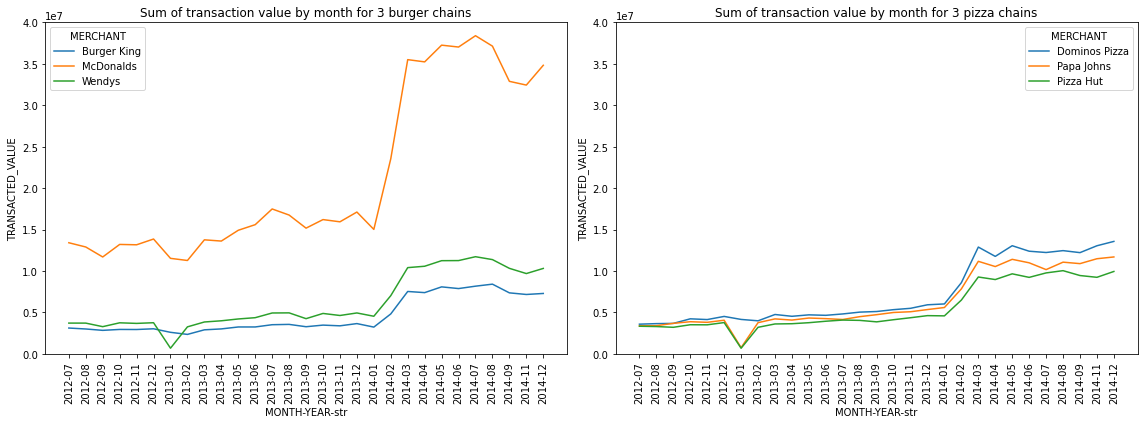

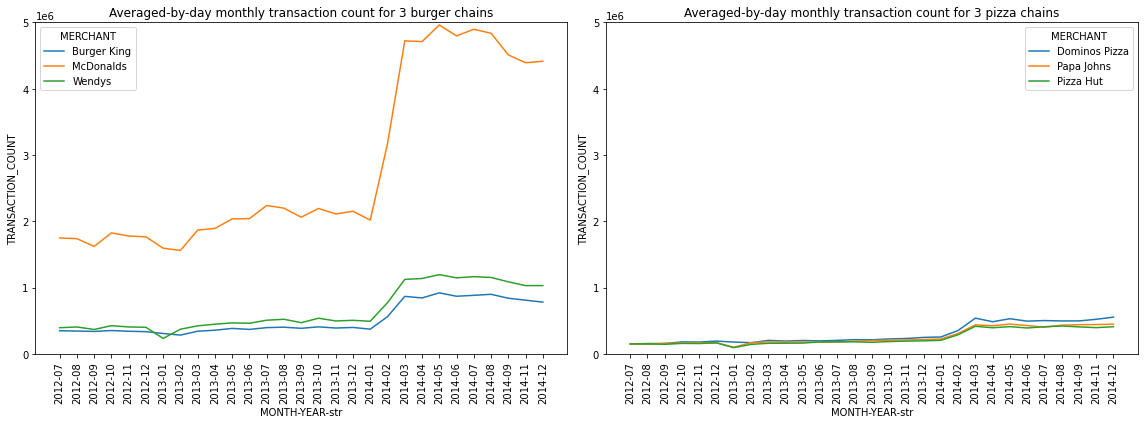

In [9]:
df_grouped = credit_card_df.groupby(by=['MERCHANT', 'MONTH-YEAR'], as_index=False)['TRANSACTED_VALUE'].sum().sort_values('MONTH-YEAR')
df_grouped['MONTH-YEAR-str'] = df_grouped['MONTH-YEAR'].dt.strftime('%Y-%m')

y_column = 'TRANSACTED_VALUE'
ylim = 4* 10**7
fig, axs = plt.subplots(1,2, figsize= (16, 6))

merchants = ['McDonalds', 'Wendys', 'Burger King']
title = 'Sum of transaction value by month for 3 burger chains'
grapth_monthly_sales(axs[0], df_grouped, merchants, y_column, title, ylim = ylim)

merchants = ['Pizza Hut', 'Dominos Pizza', 'Papa Johns']
title = 'Sum of transaction value by month for 3 pizza chains'
grapth_monthly_sales(axs[1], df_grouped, merchants, y_column, title, ylim = ylim)

plt.tight_layout()
plt.show()

df_grouped = credit_card_df.groupby(by=['MERCHANT', 'MONTH-YEAR'], as_index=False)['TRANSACTION_COUNT'].sum().sort_values('MONTH-YEAR')
df_grouped['MONTH-YEAR-str'] = df_grouped['MONTH-YEAR'].dt.strftime('%Y-%m')

y_column = 'TRANSACTION_COUNT'
ylim = 5 * 10**6
fig, axs = plt.subplots(1,2, figsize= (16, 6))

merchants = ['McDonalds', 'Wendys', 'Burger King']
title = 'Averaged-by-day monthly transaction count for 3 burger chains'
grapth_monthly_sales(axs[0], df_grouped, merchants, y_column, title, ylim = ylim)

merchants = ['Pizza Hut', 'Dominos Pizza', 'Papa Johns']
title = 'Averaged-by-day monthly transaction count for 3 pizza chains'
grapth_monthly_sales(axs[1], df_grouped, merchants, y_column, title, ylim = ylim)

plt.tight_layout()
plt.show()

Observations: 
- Burger chains have higher sales that pizza chains. 
- McDonalds is has the significantly higher sales than any of the other quick resrve restaurants. 
- On an aggregated bases it looks like the the month sales and average transaction count increases with time. However, this is not adjusted for the panel size, therefore we should be careful with drawing this conclusion. 

In [10]:
normalization_df['TRANSACTION_DATE'] = pd.to_datetime(normalization_df['TRANSACTION_DATE'])
normalization_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TRANSACTION_DATE      905 non-null    datetime64[ns]
 1   NORMALIZATION_FACTOR  905 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 14.3 KB


In [11]:
normalization_df.loc[normalization_df.duplicated(subset=['TRANSACTION_DATE'], keep=False), :]

,TRANSACTION_DATE,NORMALIZATION_FACTOR
832,2014-10-26,11354385
833,2014-10-26,11295760
834,2014-10-27,11756101
835,2014-10-27,11797289
836,2014-10-28,11410026
837,2014-10-28,11443158
838,2014-10-29,11135959
839,2014-10-29,11158306
840,2014-10-30,10856124
841,2014-10-30,10827402


In [12]:
normalization_df = normalization_df.loc[~((normalization_df['TRANSACTION_DATE'].apply(lambda x: x.month == 10)) & (normalization_df['TRANSACTION_DATE'].apply(lambda x: x.year == 2014))), :]
normalization_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 0 to 904
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TRANSACTION_DATE      893 non-null    datetime64[ns]
 1   NORMALIZATION_FACTOR  893 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.9 KB


In [13]:
credit_card_df = credit_card_df.merge(normalization_df, on='TRANSACTION_DATE', how='left')
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5298 entries, 0 to 5297
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TRANSACTION_DATE      5298 non-null   datetime64[ns]
 1   COMPANY               5298 non-null   object        
 2   MERCHANT              5298 non-null   object        
 3   TRANSACTION_COUNT     5298 non-null   int64         
 4   TRANSACTED_VALUE      5298 non-null   float64       
 5   MONTH-YEAR            5298 non-null   datetime64[ns]
 6   NORMALIZATION_FACTOR  5298 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 331.1+ KB


In [14]:
base = credit_card_df['NORMALIZATION_FACTOR'][-1:].values[0]
credit_card_df['TRANSACTED_VALUE_NORM'] = base * credit_card_df['TRANSACTED_VALUE'] / credit_card_df['NORMALIZATION_FACTOR']
credit_card_df['TRANSACTION_COUNT_NORM'] = base *credit_card_df['TRANSACTION_COUNT'] / credit_card_df['NORMALIZATION_FACTOR']
credit_card_df.head()

,TRANSACTION_DATE,COMPANY,MERCHANT,TRANSACTION_COUNT,TRANSACTED_VALUE,MONTH-YEAR,NORMALIZATION_FACTOR,TRANSACTED_VALUE_NORM,TRANSACTION_COUNT_NORM
0,2012-07-01,DPZ-USAA,Dominos Pizza,5015,121912.394861,2012-07-01,3561163,394039.387013,16209.242121
1,2012-07-02,DPZ-USAA,Dominos Pizza,3640,81396.863889,2012-07-01,3945147,237480.583276,10619.934010
2,2012-07-03,DPZ-USAA,Dominos Pizza,4494,101946.998264,2012-07-01,4194913,279727.464756,12330.870433
3,2012-07-04,DPZ-USAA,Dominos Pizza,4686,109598.420186,2012-07-01,3374031,373885.695773,15985.890740
4,2012-07-05,DPZ-USAA,Dominos Pizza,3966,94720.870081,2012-07-01,3682345,296077.106634,12396.864639


The normalization factor is high with regards to the data. To improve interpretability, I am multiplying the normalization factor by a base (normalization factor as of the last of interest).

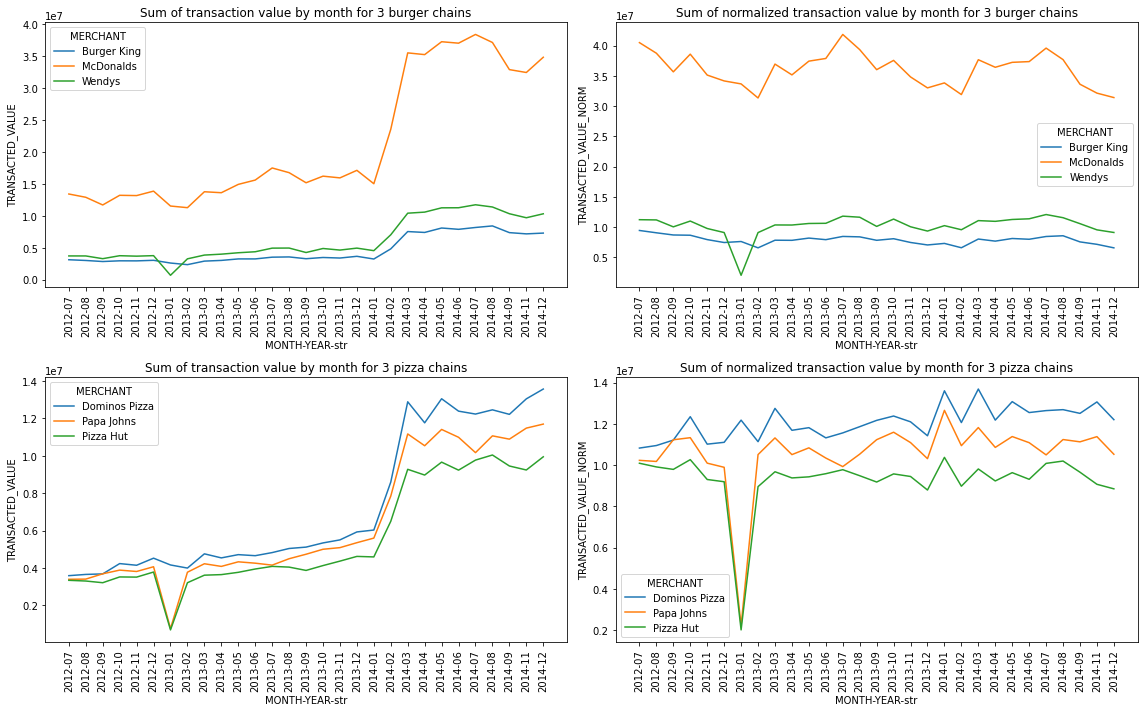

In [15]:
df_grouped = credit_card_df.groupby(by=['MERCHANT', 'MONTH-YEAR'], as_index=False)[['TRANSACTED_VALUE', 'TRANSACTED_VALUE_NORM']].sum().sort_values('MONTH-YEAR')
df_grouped['MONTH-YEAR-str'] = df_grouped['MONTH-YEAR'].dt.strftime('%Y-%m')


fig, axs = plt.subplots(2,2, figsize= (16, 10))
axs = np.ravel(axs)

merchants = ['McDonalds', 'Wendys', 'Burger King']
title = 'Sum of transaction value by month for 3 burger chains'
grapth_monthly_sales(axs[0], df_grouped, merchants, 'TRANSACTED_VALUE', title)

merchants = ['McDonalds', 'Wendys', 'Burger King']
title = 'Sum of normalized transaction value by month for 3 burger chains'
grapth_monthly_sales(axs[1], df_grouped, merchants, 'TRANSACTED_VALUE_NORM', title)

merchants = ['Pizza Hut', 'Dominos Pizza', 'Papa Johns']
title = 'Sum of transaction value by month for 3 pizza chains'
grapth_monthly_sales(axs[2], df_grouped, merchants, 'TRANSACTED_VALUE', title)

merchants = ['Pizza Hut', 'Dominos Pizza', 'Papa Johns']
title = 'Sum of normalized transaction value by month for 3 pizza chains'
grapth_monthly_sales(axs[3], df_grouped, merchants, 'TRANSACTED_VALUE_NORM', title)

plt.tight_layout()
plt.show()

The trends in the data after normalization are very different than the non-normalized once. 

- For the burger chains there is some seasonality, sales are lower in winter months and increase over summer time. 
- Burger King and Wendys seem to have stable sales between 3Q2012 and 4Q2014. For McDonald, transacted values are declining in that time period.
- The trends for pizza chains seem to be slightly increasing. 

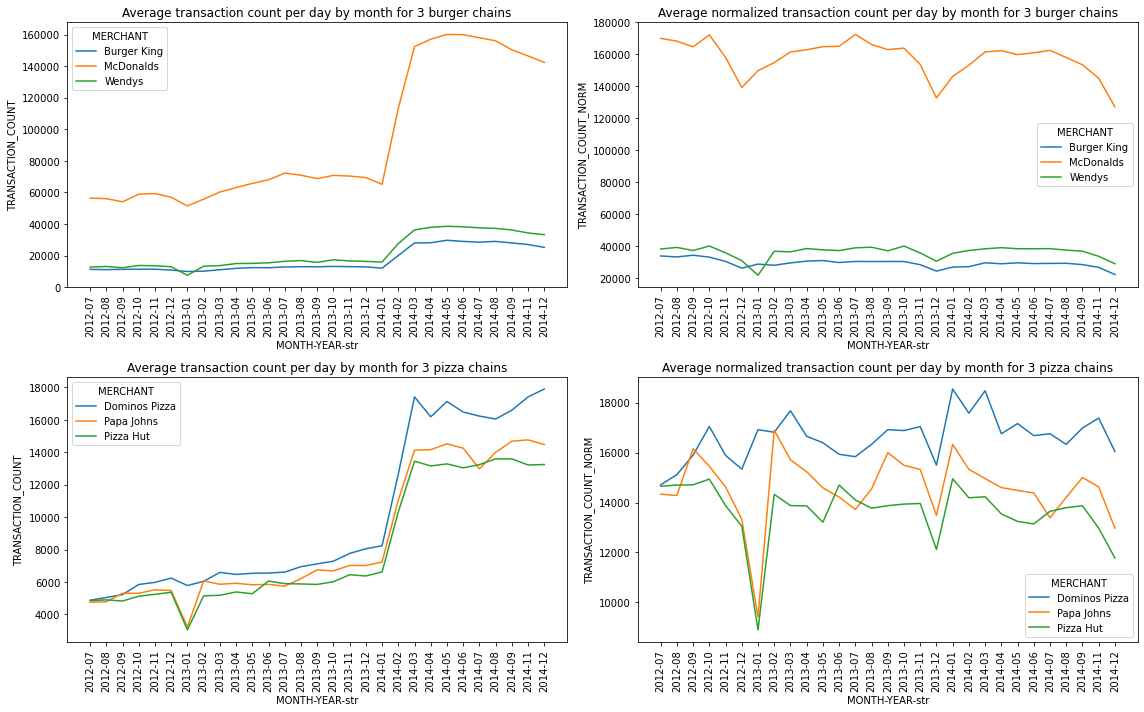

In [16]:
df_grouped = credit_card_df.groupby(by=['MERCHANT', 'MONTH-YEAR'], as_index=False)[['TRANSACTION_COUNT', 'TRANSACTION_COUNT_NORM']].mean().sort_values('MONTH-YEAR')
df_grouped['MONTH-YEAR-str'] = df_grouped['MONTH-YEAR'].dt.strftime('%Y-%m')


fig, axs = plt.subplots(2,2, figsize= (16, 10))
axs = np.ravel(axs)

merchants = ['McDonalds', 'Wendys', 'Burger King']
title = 'Average transaction count per day by month for 3 burger chains'
grapth_monthly_sales(axs[0], df_grouped, merchants, 'TRANSACTION_COUNT', title)

merchants = ['McDonalds', 'Wendys', 'Burger King']
title = 'Average normalized transaction count per day by month for 3 burger chains'
grapth_monthly_sales(axs[1], df_grouped, merchants, 'TRANSACTION_COUNT_NORM', title)

merchants = ['Pizza Hut', 'Dominos Pizza', 'Papa Johns']
title = 'Average transaction count per day by month for 3 pizza chains'
grapth_monthly_sales(axs[2], df_grouped, merchants, 'TRANSACTION_COUNT', title)

merchants = ['Pizza Hut', 'Dominos Pizza', 'Papa Johns']
title = 'Average normalized transaction count per day by month for 3 pizza chains'
grapth_monthly_sales(axs[3], df_grouped, merchants, 'TRANSACTION_COUNT_NORM', title)

plt.tight_layout()
plt.show()

After normalizing the data for panel size, we can see drastically different trends. 

Observations: 
- Interestingly, we can observe a decline in the number of transactions for the pizza chains.

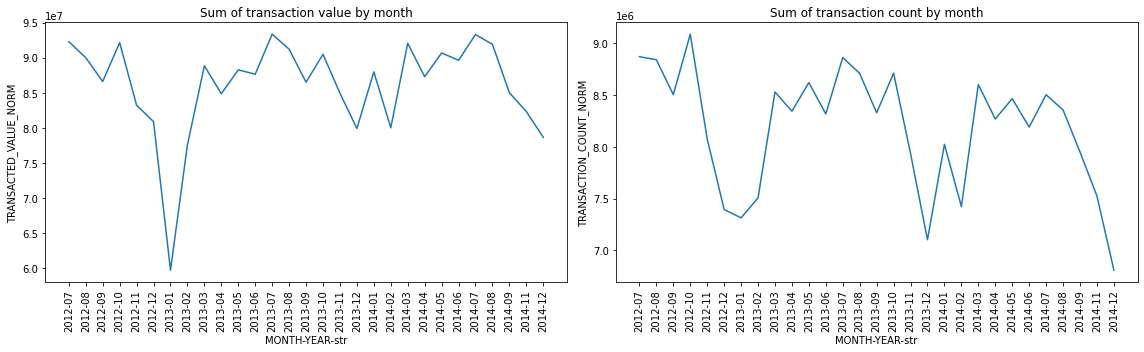

In [17]:
df_grouped = credit_card_df.groupby(by=['MONTH-YEAR'], as_index=False)[['TRANSACTED_VALUE_NORM', 'TRANSACTION_COUNT_NORM']].sum().sort_values('MONTH-YEAR')
df_grouped['MONTH-YEAR-str'] = df_grouped['MONTH-YEAR'].dt.strftime('%Y-%m')


fig, axs = plt.subplots(1,2, figsize= (16, 5))
axs = np.ravel(axs)

title = 'Sum of transaction value by month'
grapth_monthly_sales(axs[0], df_grouped, None, 'TRANSACTED_VALUE_NORM', title)

title = 'Sum of transaction count by month'
grapth_monthly_sales(axs[1], df_grouped, None, 'TRANSACTION_COUNT_NORM', title)


plt.tight_layout()
plt.show()

On the aggregated level, the sum of monthly transaction value seems constant. However, we can see the a clear decline in the average daily number of transactions.

In [13]:
credit_card_df["MONTH"] = credit_card_df['TRANSACTION_DATE'].apply(lambda x: x.month)
credit_card_df["YEAR"] = credit_card_df['TRANSACTION_DATE'].apply(lambda x: x.year)

credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5298 entries, 5440 to 33472
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TRANSACTION_DATE   5298 non-null   datetime64[ns]
 1   COMPANY            5298 non-null   object        
 2   MERCHANT           5298 non-null   object        
 3   TRANSACTION_COUNT  5298 non-null   int64         
 4   TRANSACTED_VALUE   5298 non-null   float64       
 5   MONTH-YEAR         5298 non-null   datetime64[ns]
 6   MONTH              5298 non-null   int64         
 7   YEAR               5298 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 372.5+ KB


In [14]:
credit_card_df['chain'] = credit_card_df['MERCHANT'].apply(lambda x: 'Pizza' if x in ['Pizza Hut', 'Dominos Pizza', 'Papa Johns'] else 'Burger')
df_grouped = credit_card_df.groupby(by = ['MONTH-YEAR', 'chain'], as_index=False).agg({'TRANSACTED_VALUE_NORM' : 'sum', 'TRANSACTION_COUNT_NORM': 'mean', 'MONTH':'first', 'YEAR':'first'})
# merchants = ['McDonalds', 'Wendys', 'Burger King', 'Pizza Hut', 'Dominos Pizza', 'Papa Johns']

for chain in ["Pizza", 'Burger']:
    fig, axs = plt.subplots(1,2, figsize=(16, 6))

    plot = sns.barplot(
        ax = axs[0],
        data = df_grouped.loc[df_grouped['chain'] == chain, :],
        x = 'MONTH',
        y = 'TRANSACTED_VALUE_NORM', 
        hue = 'YEAR'
    )
    plot.legend(loc='lower right')
    plot.set_title(f'{chain}: Year-2-Year normalized montly mean by day of transaction value')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

    plot = sns.barplot(
        ax = axs[1],
        data = df_grouped.loc[df_grouped['chain'] == chain, :],
        x = 'MONTH',
        y = 'TRANSACTION_COUNT_NORM', 
        hue = 'YEAR'
    )
    plot.set_title(f'{chain}: Year-2-Year normalized montly average by day of transaction count')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.legend(loc='lower right')
    
    plt.tight_layout()
    plt.show()

KeyError: "Column(s) ['TRANSACTED_VALUE_NORM', 'TRANSACTION_COUNT_NORM'] do not exist"

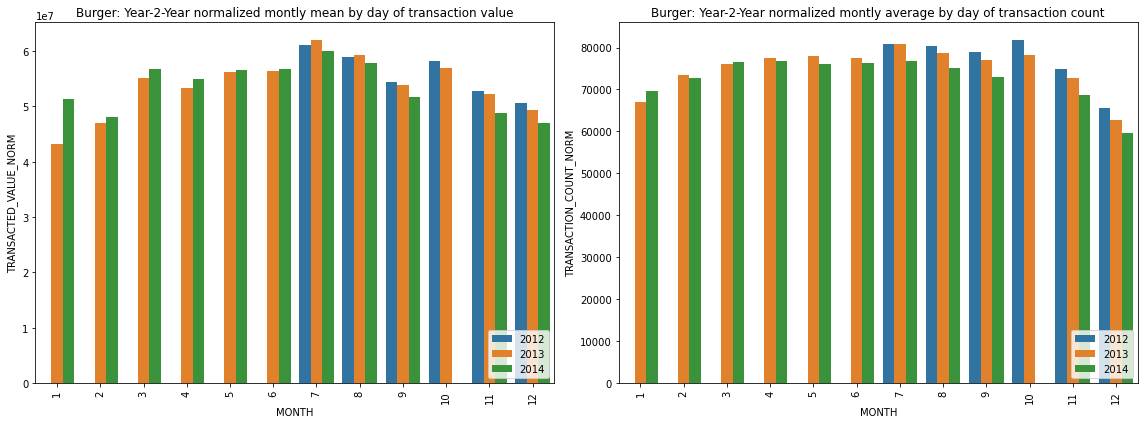

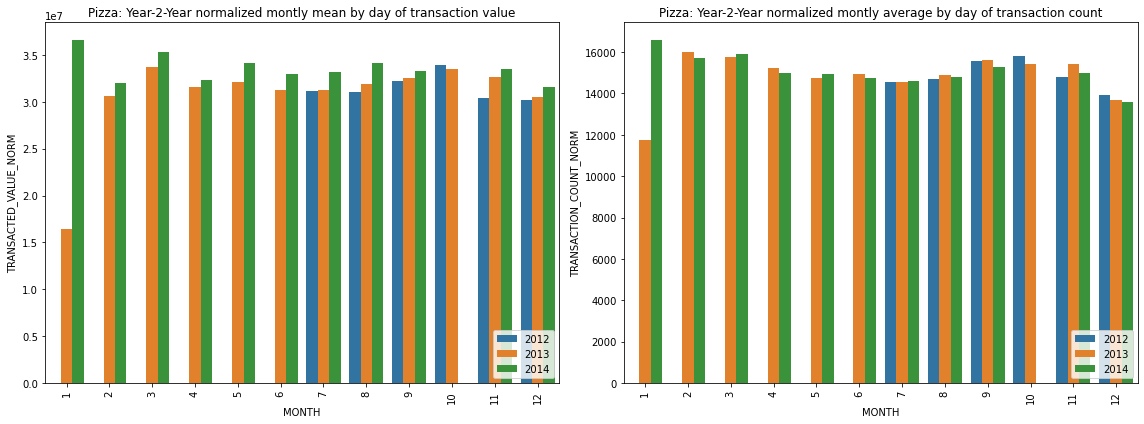

In [20]:
credit_card_df['chain'] = credit_card_df['MERCHANT'].apply(lambda x: 'Pizza' if x in ['Pizza Hut', 'Dominos Pizza', 'Papa Johns'] else 'Burger')
df_grouped = credit_card_df.groupby(by = ['MONTH-YEAR', 'chain'], as_index=False).agg({'TRANSACTED_VALUE_NORM' : 'sum', 'TRANSACTION_COUNT_NORM': 'mean', 'MONTH':'first', 'YEAR':'first'})
# merchants = ['McDonalds', 'Wendys', 'Burger King', 'Pizza Hut', 'Dominos Pizza', 'Papa Johns']

for chain in ['Burger', "Pizza", ]:
    fig, axs = plt.subplots(1,2, figsize=(16, 6))

    plot = sns.barplot(
        ax = axs[0],
        data = df_grouped.loc[df_grouped['chain'] == chain, :],
        x = 'MONTH',
        y = 'TRANSACTED_VALUE_NORM', 
        hue = 'YEAR'
    )
    plot.legend(loc='lower right')
    plot.set_title(f'{chain}: Year-2-Year normalized montly mean by day of transaction value')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

    plot = sns.barplot(
        ax = axs[1],
        data = df_grouped.loc[df_grouped['chain'] == chain, :],
        x = 'MONTH',
        y = 'TRANSACTION_COUNT_NORM', 
        hue = 'YEAR'
    )
    plot.set_title(f'{chain}: Year-2-Year normalized montly average by day of transaction count')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.legend(loc='lower right')
    
    plt.tight_layout()
    plt.show()

Obersevations:

- Burger chains: There is an increase of monthly transacted values from year 2013 to year 2014 in the first months of the year. Hovever, this trend reverses in the second half of the years and we can see a clear year over yuear monthly decline in transacted valued between 2012 and 2014. The transaction counts confirm the declining year over year trend.

- Pizza chains: There is year-over-year increase in the sum of transationed values. Interestingly, this trend is far less pronounced for average number of transations. 


Below, merchant specific data.

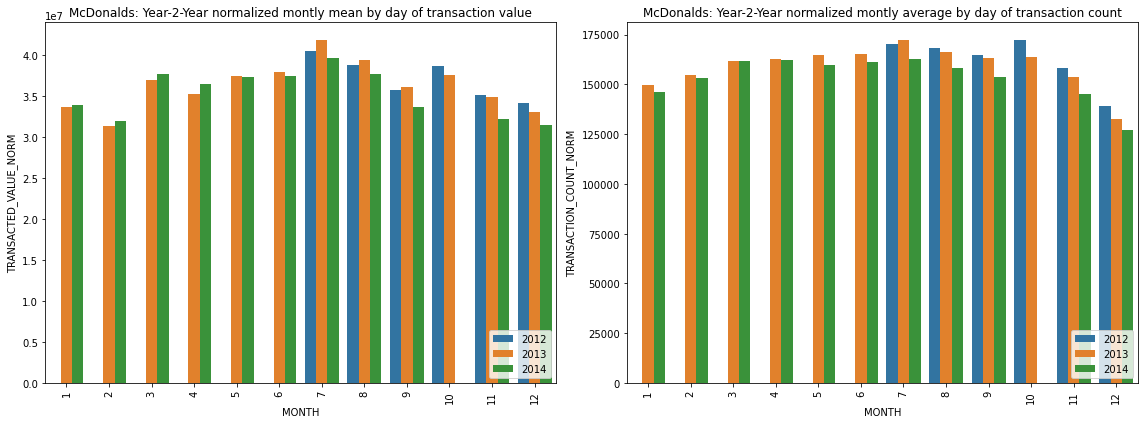

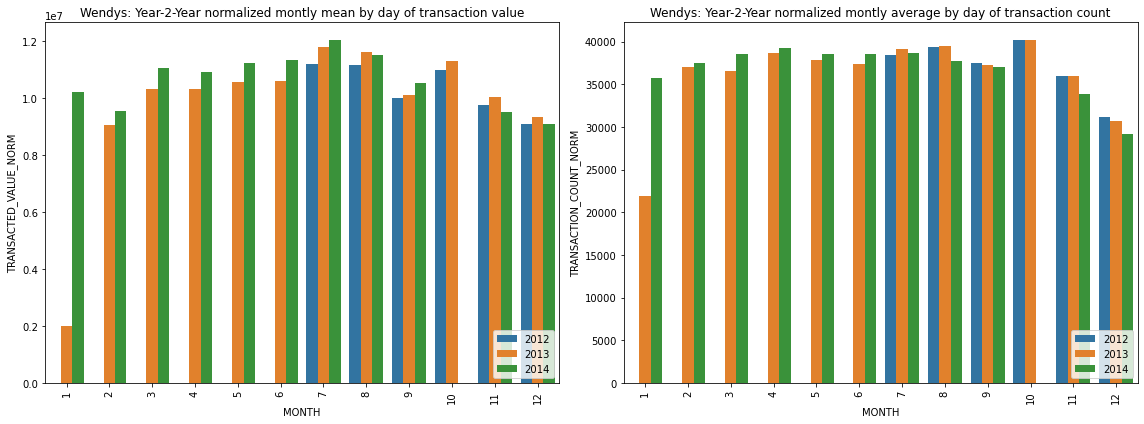

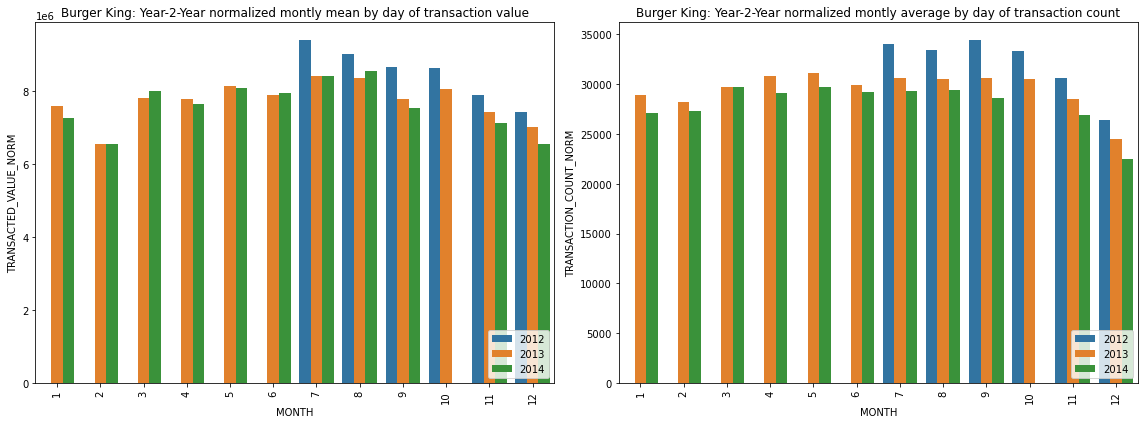

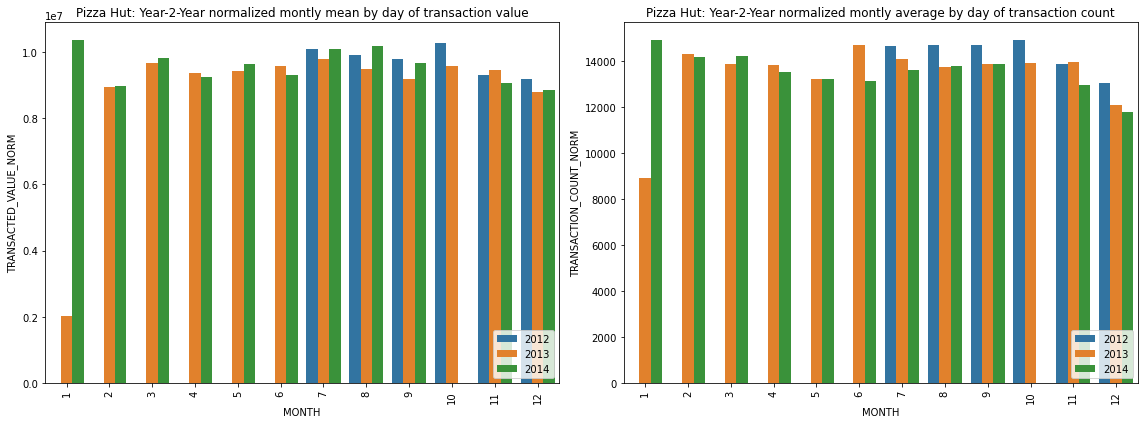

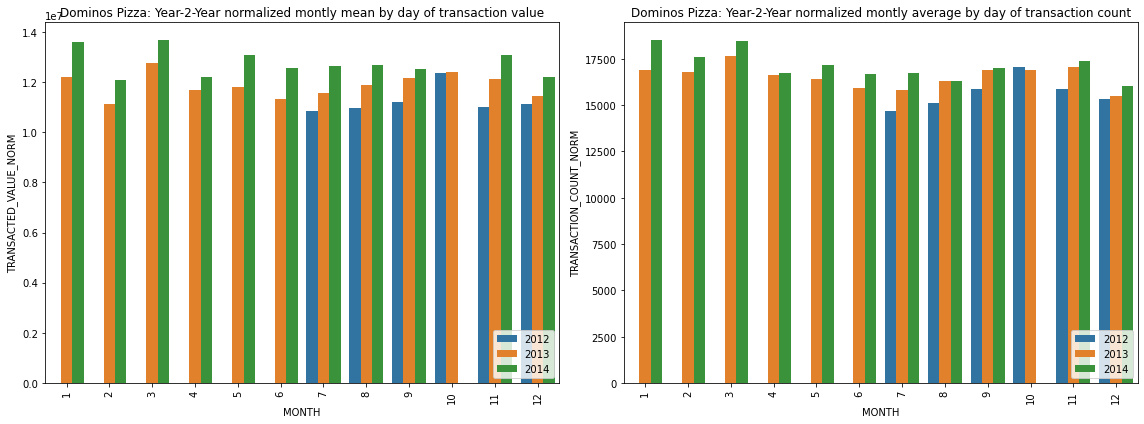

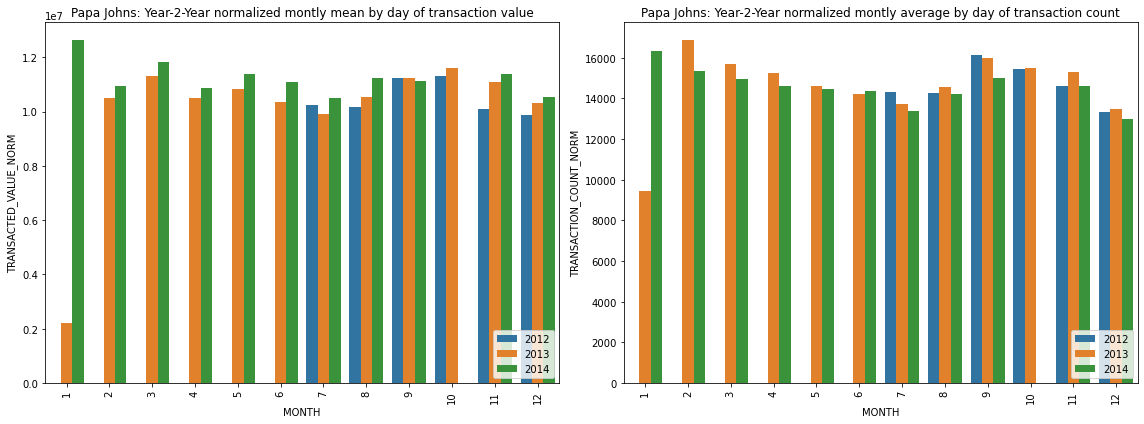

In [21]:
df_grouped = credit_card_df.groupby(by = ['MONTH-YEAR', 'MERCHANT'], as_index=False).agg({'TRANSACTED_VALUE_NORM' : 'sum', 'TRANSACTION_COUNT_NORM': 'mean', 'MONTH':'first', 'YEAR':'first'})
merchants = ['McDonalds', 'Wendys', 'Burger King', 'Pizza Hut', 'Dominos Pizza', 'Papa Johns']

for merchant in merchants:
    fig, axs = plt.subplots(1,2, figsize=(16, 6))

    plot = sns.barplot(
        ax = axs[0],
        data = df_grouped.loc[df_grouped['MERCHANT'] == merchant, :],
        x = 'MONTH',
        y = 'TRANSACTED_VALUE_NORM', 
        hue = 'YEAR'
    )
    plot.set_title(f'{merchant}: Year-2-Year normalized montly mean by day of transaction value')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.legend(loc='lower right')

    plot = sns.barplot(
        ax = axs[1],
        data = df_grouped.loc[df_grouped['MERCHANT'] == merchant, :],
        x = 'MONTH',
        y = 'TRANSACTION_COUNT_NORM', 
        hue = 'YEAR'
    )
    plot.set_title(f'{merchant}: Year-2-Year normalized montly average by day of transaction count')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

The merchant specific view gives little bit more granaul understanding of data. The aggregated panel has shown that the trends transaction trends are decling year-over-year (especially in the secod half of the year). 

We can see that this is not true for Domino's Pizza, for which the monthly year-over-year trends are increasing. 

Transacted values also seem to be increasing year over year for Papa Johns. However, the transaction counts are declining. 

#### Survey data

The survey data seems to confirm the trends in the charts. In overal, it looks like the number of visits to the fast food chains is decreasing. Customers tend to visit the fastfood stores more frequently in the first half of the year. According to the survey, Q3 in both 2013 and 2014 was the time of the year with the lowest number of visits. 

While the number of visits declines, the survey data shows that the average spent per visit increases. 

Customers participate in the promotions with various frequency. There seems to be a correlation between the number of visits and the promosions. 

Finally, there is a strong and steady increase in the app downloads.

#### URL data

Both pizza chains, Dominos and Papa Johns, number of unique users and the number of visits per unique user show strong increasing trend between the start of 2013 and the end of 2014. Furthermore, for these two chains, the average user used to spend the highest amount of time on the webpage (above 5.5 min). However, it declined in 3Q14 to less than 4.5min. 

The burger chains seems to be less popular among online customers. The number of unique viewers increased only very slightly between 1Q13 and 4Q14 for McDonals and the average number of visit per unique user declines over that time. Wedny's observes a decline in both the number of unique viewers and the number of visit per unique viewer. However, there is an interetsing bump in 1Q14.

The average time of the webpage that a custmer of McDonals spends declines in from the start of 2013 and the end of 2014. Conversely, we see a sharp increase for Wendy's. 

### Task 1

2. Thesis: With time, customers eat less at quick-serve restaurants.

3. Trends: 
- The trends display seasonality, most pronounced with a 12 month lag. 
- The overall average number of transactions by month decreases. This trend holds for individual merchants, except Domino's Pizza. 
- The monthly number of transactions decreased for McDonald's. Other burger chains hold the number of transactions constant, while the pizza chains dispaly an slight increase in the number of transactions.

- Year-over-year trends:
    - Burger chains: There is an increase in monthly transacted values from year 2013 to year 2014 in the first months of the year. However, this trend reverses in the second half of the year, and we can see a clear year-over-year monthly decline in transacted valued between 2012 and 2014. The transaction counts confirm the declining year-over-year trend.

    - Pizza chains: A year-over-year increase in the sum of transitioned values. Interestingly, this trend is far less pronounced for an average number of transactions. 

4. Conclusions:

- Between 2012 and 2014, pizza chains became more popular with customers, while burger chains seem to be declining. 
- The gain for pizza chains comes mainly from the year-over-year increase during the year's second half. 
- The number of users who download the quick food chain apps steadily increases. 
- Pizza chains experience a steady increase in activity on their web pages. 

5. Correlations: 
- There seems to be a correlation between the performance on the web and credit card transactions. 
- The survey data shows a correlation between the number of visits and the number of permissions used by customers. 

6. Survey question
- Did you visit alone, or did you eat with other people? Answer with the number of people in your party.

This information would help me to learn about the habits of the customers. Additionally, it would show how strong the social networks impact is for each of the chains.  

7. Additional metrics
- Products viewed

These metrics would explain what products drive the revenue of the restaurants. 

8. Pros and const
- Credit card data: This dataset is objective and provides core numbers about the sales in given chains. On the other hand, the data is aggregated on a high level (daily, merchant); therefore, it gives little details. Additionally, the moving panel size and the fact the normalization factor is included on a daily basis (not daily per merchant) might add bias to the data. 

- Survey data: This data gives more insight into consumers (number of app downloads and promotions). However, it is based on a small number of 10,000 customers and includes human bias (people tend to be inconsistent in their answers). 

- URL data: The URL data is collected on a larger sample, one million people. It is more systematic (does not involve people answering questions). However, it only provides metadata over the URL usage, and there is no direct data about sales.

9. Data source 
- Social media feed tagging the merchant of interest. 

As online visits seems to be driving the sales trends, I would like to get data feeds from social which are tagging the merchnats of interest. 


### Task 2: Modelling

1. Both, financial performance and share price, should be correlated with transaction data. However, share price is also speculative and includes market predition on teh value of the company. Additionally, share prices include daili volatility which might be dependend on the general market dynamics, not just the performance of the chain. Therefore, I believe that the transaction data would be better suited to predict the financial performance. For example, a big part fo the revenue are the  transaction values. 

2. Based on the answer above, I choose revenu as a variable to model.

In [22]:
mc_donalds = credit_card_df.loc[credit_card_df['MERCHANT']== 'McDonalds', :]
mc_donalds['QUATER'] = mc_donalds['TRANSACTION_DATE'].dt.quarter
mc_donalds['QYEAR'] = mc_donalds.apply(lambda x: '{}Q{}'.format(x['YEAR'], x['QUATER']), axis=1)
mc_donalds_quater = mc_donalds.groupby(by='QYEAR')['TRANSACTED_VALUE_NORM'].sum()
# October 2014 is missing, so we do a very crude calculation amd multiply the value by 3/2
mc_donalds_quater.loc['2014Q4'] = mc_donalds_quater.loc['2014Q4'] * 3/2
mc_donalds_quater

/var/folders/nx/zz31r8l16_b1jwwkfnnbhs_h0000gn/T/ipykernel_99867/2047085338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_donalds['QUATER'] = mc_donalds['TRANSACTION_DATE'].dt.quarter
/var/folders/nx/zz31r8l16_b1jwwkfnnbhs_h0000gn/T/ipykernel_99867/2047085338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_donalds['QYEAR'] = mc_donalds.apply(lambda x: '{}Q{}'.format(x['YEAR'], x['QUATER']), axis=1)


QYEAR
2012Q3    1.149074e+08
2012Q4    1.078807e+08
2013Q1    1.019581e+08
2013Q2    1.104733e+08
2013Q3    1.172148e+08
2013Q4    1.053923e+08
2014Q1    1.034093e+08
2014Q2    1.110143e+08
2014Q3    1.108920e+08
2014Q4    9.533059e+07
Name: TRANSACTED_VALUE_NORM, dtype: float64

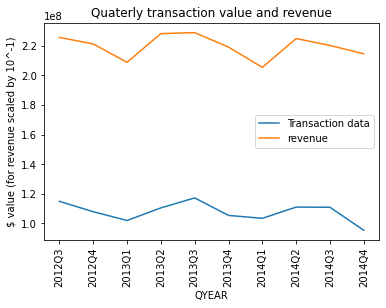

In [23]:
dates = mc_donalds_quater.index
revenue = [x * 10**5 for x in [2256.5, 2212.6, 2088.5, 2282.4, 2289, 2191.4, 2054.1, 2249, 2202.1, 2145.8]]
sns.lineplot(x=dates, y=mc_donalds_quater, label = 'Transaction data')
sns.lineplot(x=dates, y=revenue, label='revenue')
plt.title('Quaterly transaction value and revenue')
plt.ylabel('$ value (for revenue scaled by 10^-1)')
plt.xticks(rotation=90)
plt.show()


In [24]:
df = pd.DataFrame({'transactions': mc_donalds_quater, 'revenue': revenue}).sort_index()

# Choose the maximum number of lags you want to test, say 4 quarters
max_lags = 4
correlations = {}

for lag in range(0, max_lags + 1):
    # Shift the transaction data by 'lag' quarters
    df[f'transactions_lag_{lag}'] = df['transactions'].shift(lag)
    # Compute correlation with revenue
    corr = df['revenue'].corr(df[f'transactions_lag_{lag}'])
    correlations[f'Lag {lag} quarter(s)'] = corr

# Display the correlations
for lag, corr in correlations.items():
    print(f"Correlation at {lag}: {corr:.4f}")

Correlation at Lag 0 quarter(s): 0.7750
Correlation at Lag 1 quarter(s): -0.0441
Correlation at Lag 2 quarter(s): -0.8804
Correlation at Lag 3 quarter(s): 0.3253
Correlation at Lag 4 quarter(s): 0.7981


Transaction data seems to be highly correlated with the revenue at lag 0 (0.775). Interestingly, the correlation between the two vectors is even higher at lag 4 (0.7981). 

There is also a large negative correlation between revenu and transation data at lat 2. 

In [25]:
# Choose the maximum number of lags you want to test, say 4 quarters
max_lags = 4
correlations = {}

for lag in range(0, max_lags + 1):
    # Shift the transaction data by 'lag' quarters
    df[f'revenue_lag_{lag}'] = df['revenue'].shift(lag)
    # Compute correlation with revenue
    corr = df['revenue'].corr(df[f'revenue_lag_{lag}'])
    correlations[f'Lag {lag} quarter(s)'] = corr

# Display the correlations
for lag, corr in correlations.items():
    print(f"Correlation at {lag}: {corr:.4f}")

Correlation at Lag 0 quarter(s): 1.0000
Correlation at Lag 1 quarter(s): -0.1672
Correlation at Lag 2 quarter(s): -0.5986
Correlation at Lag 3 quarter(s): 0.1516
Correlation at Lag 4 quarter(s): 0.8830


I also investigated the correlation of the revenue variable with itself at different lags. As expected, we see an almost perfect correlation at lag 4. As at the time of inference, the revenue data with 4 quater lag is available, we can use it instead of the transaction data.

In [26]:
df

,transactions,revenue,transactions_lag_0,transactions_lag_1,transactions_lag_2,transactions_lag_3,transactions_lag_4,revenue_lag_0,revenue_lag_1,revenue_lag_2,revenue_lag_3,revenue_lag_4
QYEAR,,,,,,,,,,,,
2012Q3,1.149074e+08,225650000.0,1.149074e+08,NaN,NaN,NaN,NaN,225650000.0,NaN,NaN,NaN,NaN
2012Q4,1.078807e+08,221260000.0,1.078807e+08,1.149074e+08,NaN,NaN,NaN,221260000.0,225650000.0,NaN,NaN,NaN
2013Q1,1.019581e+08,208850000.0,1.019581e+08,1.078807e+08,1.149074e+08,NaN,NaN,208850000.0,221260000.0,225650000.0,NaN,NaN
2013Q2,1.104733e+08,228240000.0,1.104733e+08,1.019581e+08,1.078807e+08,1.149074e+08,NaN,228240000.0,208850000.0,221260000.0,225650000.0,NaN
2013Q3,1.172148e+08,228900000.0,1.172148e+08,1.104733e+08,1.019581e+08,1.078807e+08,1.149074e+08,228900000.0,228240000.0,208850000.0,221260000.0,225650000.0
2013Q4,1.053923e+08,219140000.0,1.053923e+08,1.172148e+08,1.104733e+08,1.019581e+08,1.078807e+08,219140000.0,228900000.0,228240000.0,208850000.0,221260000.0
2014Q1,1.034093e+08,205410000.0,1.034093e+08,1.053923e+08,1.172148e+08,1.104733e+08,1.019581e+08,205410000.0,219140000.0,228900000.0,228240000.0,208850000.0
2014Q2,1.110143e+08,224900000.0,1.110143e+08,1.034093e+08,1.053923e+08,1.172148e+08,1.104733e+08,224900000.0,205410000.0,219140000.0,228900000.0,228240000.0
2014Q3,1.108920e+08,220210000.0,1.108920e+08,1.110143e+08,1.034093e+08,1.053923e+08,1.172148e+08,220210000.0,224900000.0,205410000.0,219140000.0,228900000.0


The challenge we are facing here is a small amount of data. For example, if we want to use any 4-lag variable, we are left with 6 data points. Therefore, I will start with simple linear models.

A a base line, I will use a linear model with the following variables: 
- transactions_lag_2, transactions_lag_1, 
- transactions_lag_4, transactions_lag_2.

Interestingly, the lag 2 transaction data is more negatively correlated with revenue that the lag 2 revenue data. The second model we will take advantage of the granularity of the transaction data and add the latest month (or two months transactions). The validity of the models will depend on when do we want to do predictions and whether the the trasaction data is already avalable. 

In [27]:
results = []

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_quaters = ['2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2']
test_quaters = ['2014Q3', '2014Q4']
train_df = df.loc[train_quaters, ['transactions_lag_1', 'transactions_lag_2'] ]
train_y = df.loc[train_quaters, 'revenue']

test_df = df.loc[test_quaters, ['transactions_lag_1', 'transactions_lag_2'] ]
test_y = df.loc[test_quaters, 'revenue']

reg = LinearRegression().fit(train_df, train_y)

y_pred_train = reg.predict(train_df)
rmse_train = np.sqrt(mean_squared_error(y_true=train_y, y_pred=y_pred_train))
y_pred_test = reg.predict(test_df)
rmse_test = np.sqrt(mean_squared_error(y_true=test_y, y_pred=y_pred_test))

print('Train RMSE: ', rmse_train)
print('Test RMSE: ', rmse_test)
results.append(['Model: lag_1, lag_2', rmse_train, rmse_test, reg.intercept_, reg.coef_])



Train RMSE:  2916824.3796484233
Test RMSE:  6387679.96003665


In [31]:
train_quaters = [ '2013Q3', '2013Q4', '2014Q1', '2014Q2']
test_quaters = ['2014Q3', '2014Q4']
train_df = df.loc[train_quaters, ['transactions_lag_2',  'transactions_lag_4'] ]
train_y = df.loc[train_quaters, 'revenue']

test_df = df.loc[test_quaters, ['transactions_lag_2',  'transactions_lag_4'] ]
test_y = df.loc[test_quaters, 'revenue']

reg = LinearRegression().fit(train_df, train_y)

y_pred_train = reg.predict(train_df)
rmse_train = np.sqrt(mean_squared_error(y_true=train_y, y_pred=y_pred_train))
y_pred_test = reg.predict(test_df)
rmse_test = np.sqrt(mean_squared_error(y_true=test_y, y_pred=y_pred_test))

print('Train RMSE: ', rmse_train)
print('Test RMSE: ', rmse_test)
results.append(['Model: lag_2, lag_4', rmse_train, rmse_test, reg.intercept_, reg.coef_])

Train RMSE:  1366530.3194317373
Test RMSE:  5748434.188417982


In [32]:
mc_donalds['QMONTH'] = mc_donalds['MONTH'] % 3
mc_donalds['QMONTHYEAR'] = mc_donalds.apply(lambda x: '{}_{}'.format(x['QYEAR'], x['QMONTH']), axis=1) 
mc_donalds.head()

/var/folders/nx/zz31r8l16_b1jwwkfnnbhs_h0000gn/T/ipykernel_99867/4166019000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_donalds['QMONTH'] = mc_donalds['MONTH'] % 3
/var/folders/nx/zz31r8l16_b1jwwkfnnbhs_h0000gn/T/ipykernel_99867/4166019000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_donalds['QMONTHYEAR'] = mc_donalds.apply(lambda x: '{}_{}'.format(x['QYEAR'], x['QMONTH']), axis=1)


,TRANSACTION_DATE,COMPANY,MERCHANT,TRANSACTION_COUNT,TRANSACTED_VALUE,MONTH-YEAR,NORMALIZATION_FACTOR,TRANSACTED_VALUE_NORM,TRANSACTION_COUNT_NORM,MONTH,YEAR,chain,QUATER,QYEAR,QMONTH,QMONTHYEAR
883,2012-07-01,MCD-USAA,McDonalds,52623,449706.732985,2012-07-01,3561163,1.453521e+06,170085.533030,7,2012,Burger,3,2012Q3,1,2012Q3_1
884,2012-07-02,MCD-USAA,McDonalds,52210,389511.005943,2012-07-01,3945147,1.136423e+06,152326.031501,7,2012,Burger,3,2012Q3,1,2012Q3_1
885,2012-07-03,MCD-USAA,McDonalds,55935,419052.171621,2012-07-01,4194913,1.149817e+06,153477.355955,7,2012,Burger,3,2012Q3,1,2012Q3_1
886,2012-07-04,MCD-USAA,McDonalds,48557,406755.699753,2012-07-01,3374031,1.387612e+06,165648.078675,7,2012,Burger,3,2012Q3,1,2012Q3_1
887,2012-07-05,MCD-USAA,McDonalds,55191,414895.277926,2012-07-01,3682345,1.296874e+06,172515.218433,7,2012,Burger,3,2012Q3,1,2012Q3_1


In [33]:
latest_transactions = mc_donalds.groupby(by='QMONTHYEAR').agg({'TRANSACTED_VALUE_NORM':'sum', 'QYEAR':'first', 'QMONTH':'first'}).pivot_table(columns='QMONTH', index = 'QYEAR')
latest_transactions.columns = ['QMONTH_1', 'QMONTH_2', 'QMONTH_3']
df = pd.concat([df, latest_transactions], axis=1)
df.loc['2014Q4', 'QMONTH_2'] = df.loc['2014Q4', ['QMONTH_1', 'QMONTH_3']].mean()
df['QMONTH_12'] = df['QMONTH_1'] + df['QMONTH_2']


In [40]:
train_quaters = ['2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2']
test_quaters = ['2014Q3', '2014Q4']

columns = [ 'transactions_lag_1', 'transactions_lag_2', 'QMONTH_12']
train_df = df.loc[train_quaters, columns ]
train_y = df.loc[train_quaters, 'revenue']

test_df = df.loc[test_quaters,  columns]
test_y = df.loc[test_quaters, 'revenue']

reg = LinearRegression().fit(train_df, train_y)

y_pred_train = reg.predict(train_df)
rmse_train = np.sqrt(mean_squared_error(y_true=train_y, y_pred=y_pred_train))
y_pred_test = reg.predict(test_df)
rmse_test = np.sqrt(mean_squared_error(y_true=test_y, y_pred=y_pred_test))

print('Train RMSE: ', rmse_train)
print('Test RMSE: ', rmse_test)
results.append(['Model: lag_1, lag_2, QMONTH_12', rmse_train, rmse_test, reg.intercept_, reg.coef_])

Train RMSE:  2319913.3446763763
Test RMSE:  12700895.981721248


In [44]:
train_quaters = ['2013Q3', '2013Q4', '2014Q1', '2014Q2']
test_quaters = ['2014Q3', '2014Q4']

columns = [ 'transactions_lag_4', 'QMONTH_12']
train_df = df.loc[train_quaters, columns ]
train_y = df.loc[train_quaters, 'revenue']

test_df = df.loc[test_quaters,  columns]
test_y = df.loc[test_quaters, 'revenue']

reg = LinearRegression().fit(train_df, train_y)

y_pred_train = reg.predict(train_df)
rmse_train = np.sqrt(mean_squared_error(y_true=train_y, y_pred=y_pred_train))
y_pred_test = reg.predict(test_df)
rmse_test = np.sqrt(mean_squared_error(y_true=test_y, y_pred=y_pred_test))

print('Train RMSE: ', rmse_train)
print('Test RMSE: ', rmse_test)
results.append(['Model: lag_4, QMONTH_12', rmse_train, rmse_test, reg.intercept_, reg.coef_])

Train RMSE:  1065956.0139266856
Test RMSE:  14136832.746418657


In [45]:
train_quaters = ['2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2']
test_quaters = ['2014Q3', '2014Q4']

columns = [ 'transactions_lag_2', 'QMONTH_12']
train_df = df.loc[train_quaters, columns ]
train_y = df.loc[train_quaters, 'revenue']

test_df = df.loc[test_quaters,  columns]
test_y = df.loc[test_quaters, 'revenue']

reg = LinearRegression().fit(train_df, train_y)

y_pred_train = reg.predict(train_df)
rmse_train = np.sqrt(mean_squared_error(y_true=train_y, y_pred=y_pred_train))
y_pred_test = reg.predict(test_df)
rmse_test = np.sqrt(mean_squared_error(y_true=test_y, y_pred=y_pred_test))

print('Train RMSE: ', rmse_train)
print('Test RMSE: ', rmse_test)
results.append(['Model: lag_2, QMONTH_12', rmse_train, rmse_test, reg.intercept_, reg.coef_])

Train RMSE:  2599797.656072241
Test RMSE:  12127316.481865609


In [46]:
pd.DataFrame(results, columns = ['Model name', 'train error', 'test error', 'intercept', 'coefficients'])

,Model name,train error,test error,intercept,coefficients
0,"Model: lag_1, lag_2",2.916824e+06,6.387680e+06,4.159398e+08,"[-0.14641210168593993, -1.6502350055086974]"
1,"Model: lag_2, lag_4",1.366530e+06,5.748434e+06,3.641147e+08,"[-1.4396179138194096, 0.1107037037533472]"
2,"Model: lag_1, lag_2, QMONTH_12",2.319913e+06,1.270090e+07,5.819568e+08,"[-0.23894053714459448, -2.1872122392368674, -1..."
3,"Model: lag_1, lag_2, QMONTH_12",2.319913e+06,1.270090e+07,5.819568e+08,"[-0.23894053714459448, -2.1872122392368674, -1..."
4,"Model: lag_1, lag_2, QMONTH_12",2.599798e+06,1.212732e+07,5.293661e+08,"[-2.093493679675449, -1.1056757216870516]"
5,"Model: lag_4, QMONTH_12",1.065956e+06,1.413683e+07,3.472560e+07,"[2.304592635009787, -0.89728271538125]"
6,"Model: lag_2, QMONTH_12",2.599798e+06,1.212732e+07,5.293661e+08,"[-2.093493679675449, -1.1056757216870516]"


The correlation analisis has shown that there is potential to predit revenue from transaction data. However, the limited numebr of data point seems to make it difficult. 

- The model with lag_2 and lag_4 seem to be doing the best. It has the smalles test error. 
- The second best model is lag_1 and lag_2. However, we can obser that if we add an extra variable the model's test error increases significantly, indicating overfitting. 
- Finally, it does not seem the that the transaction data from the previous months increases the model's predictive power.

Recommendation: 

- The visual analysis has show trends in the data. It can be observed that the transaction values of pizza chains incerased, while the transaction values of birger chains have decreased since 3Q2012.

- We have also show a strong correlation between the transaction data and the KPI-base performace metrics, revenue, of McDonald's. It looks like the transaction value data with a lag of 4 quaters has an almost 80% correlation with revnue. 

- Modelling: Based on the observatio above we tried a few models. However, the small number of data points does not let us to derive nay conclusions. The models show high test error and seem to be extremly prone to overfitting.